# Файл телеметрии

In [1]:
!pwd
!date
!ls

/home/alena/SIT/Analysis/Baselines
Чт фев 13 12:51:32 MSK 2020
Baselines.ipynb  Parser.dat    tele.csv
Baselines.txt	 Parser.ipynb  Telemetry.ipynb


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
from matplotlib import dates
import datetime as dt

In [3]:
plt.rcParams['figure.figsize'] =(8,4)
plt.rcParams['lines.markersize'] = 3.5
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['grid.alpha'] = 0.7
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 14

In [4]:
filename = "tele.csv"
columns = ['event', 'syncro', 'tmicro', 'timesec', 'date', 'time', 'cur', 'summ']
tele = pd.read_csv(filename, header = None, index_col=None, sep='\s+', names=columns)
print(tele.shape)
tele.head()

(1065297, 8)


,event,syncro,tmicro,timesec,date,time,cur,summ
0,57069,-1,14:06:45.674,1569074955,2019-09-21,14:09:15,106,16133.45
1,57070,-1,14:06:58.674,1569074968,2019-09-21,14:09:28,106,21243.75
2,57071,-1,14:07:12.674,1569074982,2019-09-21,14:09:42,106,20587.86
3,57072,-1,14:07:12.674,1569074982,2019-09-21,14:09:42,106,14999.95
4,57073,-1,14:08:13.674,1569075043,2019-09-21,14:10:43,103,15707.61


In [ ]:
# Удалить повторы
tele = tele.drop_duplicates(subset=['event'], keep='first')
print(tele.shape)

In [5]:
# проверить наличие повторв
tele.event.value_counts()

57316     1
625764    1
638050    1
631905    1
633952    1
         ..
776144    1
569279    1
567230    1
573373    1
57372     1
Name: event, Length: 1065297, dtype: int64

In [ ]:
# Выкинуть нули
tele0 = tele.loc[(base != 0).all(axis = 1)]
print(tele0.shape)

In [6]:
tele1 = tele.dropna()
print(tele1.shape)

(1065297, 8)


Text(0.5, 1.0, 'event')

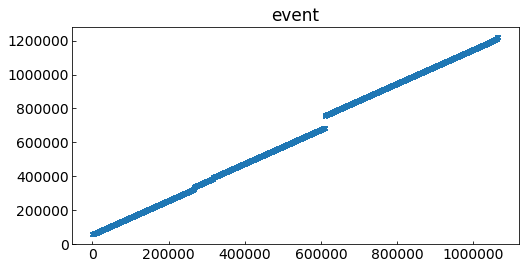

In [7]:
i=0
plt.plot(tele[columns[i]].values, 'x')
plt.title(columns[i])

Text(0.5, 1.0, 'syncro')

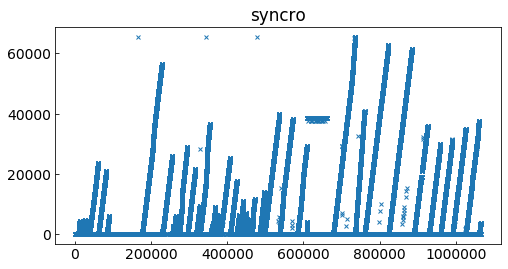

In [8]:
i=1
plt.plot(tele[columns[i]].values, 'x')
plt.title(columns[i])

Text(0.5, 1.0, 'cur')

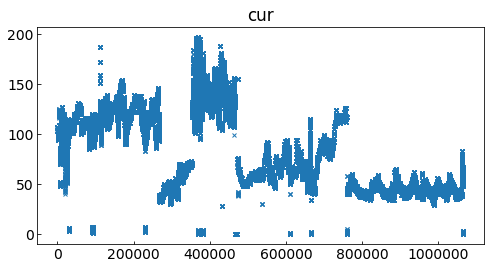

In [15]:
i=6
x = tele.cur[tele.cur < 1000000].values
plt.plot(x, 'x')
plt.title(columns[i])

In [14]:
tele[tele.cur>10000]

,event,syncro,tmicro,timesec,date,time,cur,summ
664650,812528,-1,00:36:06.008,1579538166,2020-01-20,16:36:06,16777215,278.59
664670,812548,-1,00:46:19.048,1579538779,2020-01-20,16:46:19,16777215,221.24
760003,907881,40132,04:44:15.065,1579639455,2020-01-21,20:44:15,16777215,281.46
760004,907882,40133,04:44:36.090,1579639476,2020-01-21,20:44:36,16777215,152.48
760005,907883,40134,04:44:40.079,1579639480,2020-01-21,20:44:40,16777215,133.35
760006,907884,40135,04:44:42.031,1579639482,2020-01-21,20:44:42,16777215,284.00
760007,907885,40136,04:44:48.090,1579639488,2020-01-21,20:44:48,16777215,282.06
760216,908094,40345,05:29:42.043,1579642182,2020-01-21,21:29:42,16777215,148.04
760217,908095,40346,05:29:51.083,1579642191,2020-01-21,21:29:51,16777215,96.57
760218,908096,40347,05:29:57.035,1579642197,2020-01-21,21:29:57,16777215,158.31


Text(0.5, 1.0, 'summ')

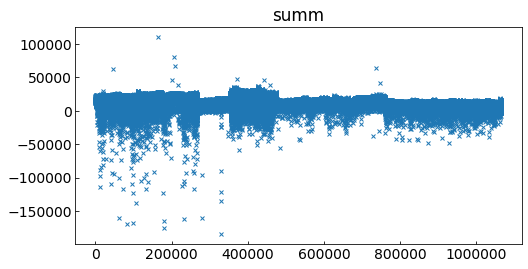

In [10]:
i=7
plt.plot(tele[columns[i]].values, 'x')
plt.title(columns[i])